# SVM

In [2]:
import numpy as np                     # Llibreria matematica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds          # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv   # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('fake_job_preprocessed.csv')
data

,title,location,department,salary_range,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6.333616e-09,0.041026,0.000000e+00,2.222222e-02,0.000051,0.056281,0.056281,0,1,0,0.166667,0.068627,0.102041,4.431315e-03,0.017964,0
1,3.003079e-01,0.380666,6.413994e-02,5.628121e-02,0.144389,0.056281,0.015136,0,0,0,0.041833,0.039746,0.012579,3.703704e-02,0.032536,0
2,5.628121e-02,0.000000,5.628121e-02,1.513635e-02,0.015136,0.056281,0.056281,0,1,1,0.050260,0.030513,0.027523,0.000000e+00,0.019231,0
3,1.513635e-02,0.002669,6.413994e-02,1.160042e-10,0.144389,0.056281,0.056281,0,0,0,0.050260,0.030513,0.017430,1.732102e-02,0.015110,0
4,5.628121e-02,0.000003,3.430079e-02,1.391622e-04,0.015136,0.056281,0.056281,0,1,1,0.050260,0.145455,0.017430,7.816336e-13,0.017516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,5.628121e-02,0.003155,3.430079e-02,3.153322e-10,0.000019,0.056281,0.056281,0,1,1,0.050260,0.132733,0.017430,1.911765e-01,0.017516,0
5202,3.806656e-01,0.056281,3.430079e-02,3.003079e-01,0.144389,0.056281,0.380666,0,1,0,0.050260,0.132733,0.065969,1.276596e-01,0.017516,0
5203,0.000000e+00,0.021277,2.272727e-02,0.000000e+00,0.000377,0.056281,0.000377,0,1,0,0.050260,0.039746,0.017430,1.879699e-03,0.000000,0
5204,6.944797e-06,0.057692,1.391622e-04,3.749082e-17,0.144389,0.002669,0.002669,0,0,0,0.050260,0.030513,0.017430,4.431315e-03,0.015110,0


In [3]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.33, random_state=1)

In [4]:
def best_k(knc):
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    #print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, y_pred))
    # devolvemos el f1
    return sklearn.metrics.f1_score(y_test, y_pred)

### SVC linear kernel

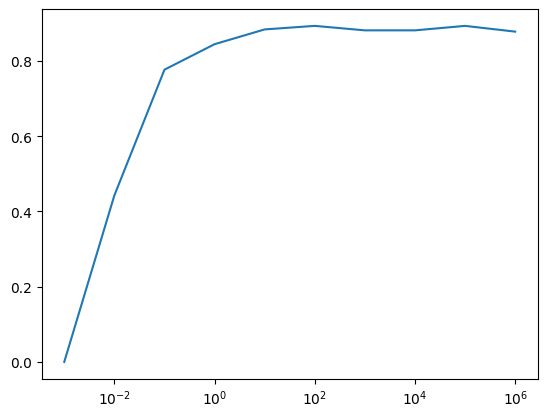

<Figure size 640x480 with 0 Axes>

In [5]:
scores = []
high_score = 0
high_c = 0
Cs = np.logspace(-3, 6, num=10, base=10.0)
for c in Cs:
    knc = SVC(kernel='linear',C=c)
    score = best_k(knc)
    if score > high_score:
        high_c = c
        high_score = score
    scores.append(score)


plt.semilogx(Cs,scores)
plt.show()

plt.savefig('best_c.png')

In [6]:
print(high_c)

100.0


### SVC Poly kernel

pruebas con degree 2

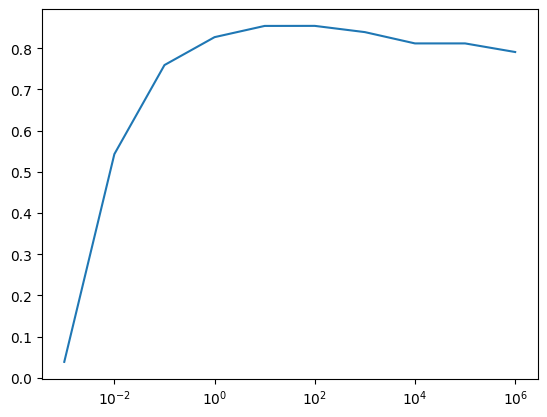

<Figure size 640x480 with 0 Axes>

In [7]:
scores = []
high_score = 0
high_c = 0
Cs = np.logspace(-3, 6, num=10, base=10.0)
for c in Cs:
    knc = SVC(kernel='poly',C=c, degree=2)
    score = best_k(knc)
    if score > high_score:
        high_c = c
        high_score = score
    scores.append(score)

plt.semilogx(Cs,scores)
plt.show()

plt.savefig('best_c.png')

con degree 3

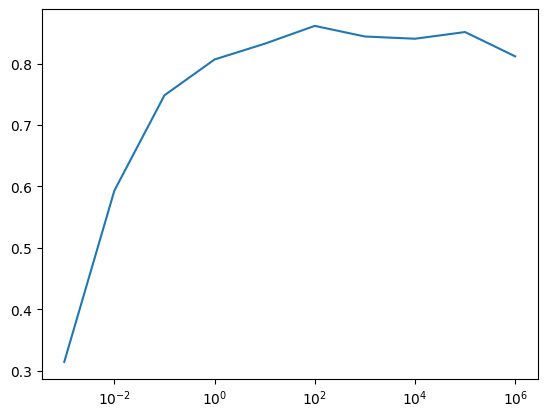

<Figure size 640x480 with 0 Axes>

In [8]:
scores = []
high_score = 0
high_c = 0
Cs = np.logspace(-3, 6, num=10, base=10.0)
for c in Cs:
    knc = SVC(kernel='poly',C=c, degree=3)
    score = best_k(knc)
    if score > high_score:
        high_c = c
        high_score = score
    scores.append(score)

plt.semilogx(Cs,scores)
plt.show()

plt.savefig('best_c.png')

In [4]:
print(high_c)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


resultados muy similiares en performance. Dado que no podemos decir que el degree 3 sea mejor que el 2, nos quedaremos con el más simple siempre, en este caso el degree 2. Respecto al valor de C en ambos casos sale que la mejor es con valor 100.

### SVC RBF Kernel

Mejor combinación parmetros encontrados: {'C': 10000.0, 'gamma': 0.01}


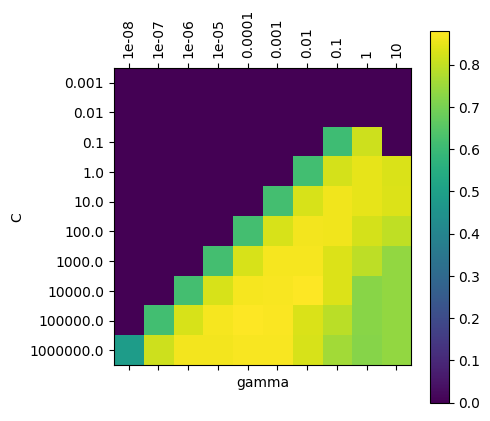

In [10]:
# Definimos el modelo que queremos entrenar y optimizar
model = SVC(kernel='rbf')

# Parametros a utilizar
gammas = [0.00000001, 0.0000001, 0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-3, 6, num=10, base=10.0)
param_grid = {'C': Cs, 'gamma' : gammas}

# Define el grid de búsqueda y utiliza la puntuación F1 como métrica
grid_search = GridSearchCV(model, param_grid, scoring='f1')

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados
print('Mejor combinación parmetros encontrados:', grid_search.best_params_)

# Utiliza los mejores hiperparámetros encontrados para entrenar el modelo final
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()

### Vamos a ver cual de los tres kernels funciona mejor

In [11]:
# Define the decision tree classifier
model = SVC()

parameters = []

# Best params for each kernel
parameters.append({'kernel': ['poly'],
              'C': [100],
              'degree': [2, 3]})
parameters.append({'kernel': ['linear'],
              'C': [100]})
parameters.append({'kernel': ['rbf'],
              'C': [10000],
              'gamma': [0.01]})

In [17]:
# Create a randomized search object using the decision tree classifier and the parameters dictionary
rs = RandomizedSearchCV(model, parameters, cv=10, scoring='f1')

rs.fit(X_train, y_train)

print('Mejores parámetros:', rs.best_params_)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
Mejores parámetros: {'kernel': 'linear', 'C': 100}


In [13]:
knc = SVC(kernel='linear', C=100)

knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("f1:", sklearn.metrics.f1_score(y_test, pred), "con parámetros", rs.best_params_)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==100) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

f1: 0.8936170212765957 con parámetros {'kernel': 'linear', 'C': 100}

Number of supports:  115 ( 99 of them have slacks)
Prop. of supports:  0.03297018348623853


### SVM main supports

In [14]:
main_supports = knc.support_
main_supports

array([   0,   11,   31,   41,  163,  186,  253,  277,  278,  303,  387,
        403,  489,  552,  656,  754,  793,  824,  828,  942, 1044, 1055,
       1119, 1194, 1199, 1256, 1268, 1277, 1337, 1344, 1438, 1456, 1566,
       1582, 1656, 1682, 1823, 1826, 1871, 2048, 2132, 2261, 2268, 2349,
       2414, 2427, 2532, 2579, 2625, 2739, 2742, 2814, 2846, 2908, 3038,
       3072, 3143, 3266, 3369, 3464,    3,  168,  256,  335,  454,  470,
        548,  604,  610,  678,  703,  819,  907,  988, 1005, 1021, 1050,
       1169, 1393, 1433, 1499, 1583, 1662, 1664, 1751, 1792, 1820, 1881,
       1891, 1921, 2000, 2097, 2212, 2509, 2563, 2577, 2616, 2646, 2688,
       2867, 2875, 2900, 2920, 2941, 3116, 3144, 3168, 3176, 3197, 3212,
       3374, 3426, 3445, 3484, 3487], dtype=int32)

### Con cross-validation

In [15]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

In [16]:
from sklearn import metrics
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a DT classifier object
knc = SVC(kernel='linear',C=100)

# Train the classifier
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1467
         1.0       0.95      0.81      0.87        95

    accuracy                           0.99      1562
   macro avg       0.97      0.90      0.93      1562
weighted avg       0.99      0.99      0.99      1562



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91572d65-ca52-49ec-8072-8fb246390be4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>